# TSP Design Implementation
This Notebook serves to show the initial implementation of the GA for the TSP as part of the project portfolio. For running the algorithms, please navigate to the other Notebook: `TSM_performance_testing.ipynb`.

<br> <!-- Adds a single line break -->

You will find the README for Problem 1 in`TSM_performance_testing.ipynb`.

`TSM_performance_testing.ipynb`

### Step 1
Important Imports

In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import random


### Step 2: Define the Problem (TSP)

Represent cities as points in a 2D plane. The distance between two cities is the Euclidean distance.

In [3]:
# Defines TSP

def euclidean_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

def total_distance(route, cities):
    return sum(euclidean_distance(cities[route[i]], cities[route[i + 1]]) for i in range(len(route) - 1)) + \
           euclidean_distance(cities[route[-1]], cities[route[0]])  # Return to start city


### Step 3: Initialise the Population

encode a solution as a permutation (a list of city indices)

In [4]:
# Initialise the population

def create_initial_population(cities, population_size):
    population = []
    for _ in range(population_size):
        individual = list(np.random.permutation(len(cities)))  # Random permutation of city indices
        population.append(individual)
    return population


### Step 4: Define the Fitness Function
Since we minimize distance, fitness is 1 / total distance.

In [5]:
# Define the fitness function

def fitness(individual, cities):
    return 1 / total_distance(individual, cities)  # Lower distance -> Higher fitness


### Step 5: Selection (Tournament Selection)
Tournament selection chooses the best individual from a random subset.

In [6]:
# Define tournament selection

def tournament_selection(population, cities, tournament_size=5):
    selected = random.sample(population, tournament_size)
    selected.sort(key=lambda x: fitness(x, cities), reverse=True)
    return selected[0]  # Best individual


### Step 6: Crossover
Crossover ensures that the offspring inherits a segment from one parent (as well as keeping city in order).

In [7]:
# Defines crossover

def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))  # Select two random crossover points
    
    child = [None] * size
    child[start:end] = parent1[start:end]  # Copy a segment from parent1
    
    # Fill in the remaining cities from parent2
    fill_values = [city for city in parent2 if city not in child]
    fill_index = 0
    for i in range(size):
        if child[i] is None:
            child[i] = fill_values[fill_index]
            fill_index += 1
    
    return child


### Step 7: Mutation 
Randomly swap two cities to introduce diversity (swap mutation).

In [8]:
# Defines swap mutation

def swap_mutation(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual


### Step 8: Make the GA algorithm 
Combines selection, crossover, and mutation into the full GA

In [9]:
# Defines the GA TSP algorithm 

def genetic_algorithm_tsp(cities, population_size=100, generations=500, mutation_rate=0.1):
    # Step 1: Create Initial Population
    population = create_initial_population(cities, population_size)
    
    best_solution = None
    best_distance = float("inf")
    history = []  # Track best fitness over generations
    
    for gen in range(generations):
        new_population = []
        
        # Step 2: Create Next Generation
        for _ in range(population_size // 2):  # Produce population_size offspring
            parent1 = tournament_selection(population, cities)
            parent2 = tournament_selection(population, cities)
            
            # Crossover
            child1 = ordered_crossover(parent1, parent2)
            child2 = ordered_crossover(parent2, parent1)
            
            # Mutation
            child1 = swap_mutation(child1, mutation_rate)
            child2 = swap_mutation(child2, mutation_rate)
            
            new_population.extend([child1, child2])
        
        population = new_population
        
        # Step 3: Track Best Solution
        current_best = min(population, key=lambda x: total_distance(x, cities))
        current_best_distance = total_distance(current_best, cities)
        
        if current_best_distance < best_distance:
            best_solution = current_best
            best_distance = current_best_distance
        
        history.append(best_distance)
        
        if gen % 50 == 0:
            print(f"Generation {gen}: Best Distance = {best_distance:.2f}")
    
    return best_solution, best_distance, history


### Step 9: Testing and Visualisation
Testing the algorithm on a random set of cities.

Generation 0: Best Distance = 750.71
Generation 50: Best Distance = 373.41
Generation 100: Best Distance = 370.63
Generation 150: Best Distance = 370.63
Generation 200: Best Distance = 370.63
Generation 250: Best Distance = 370.63
Generation 300: Best Distance = 370.63
Generation 350: Best Distance = 370.63
Generation 400: Best Distance = 370.63
Generation 450: Best Distance = 370.63


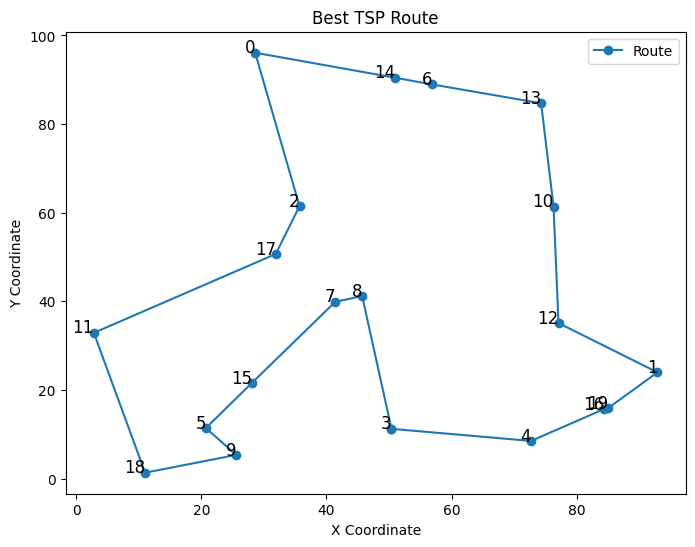

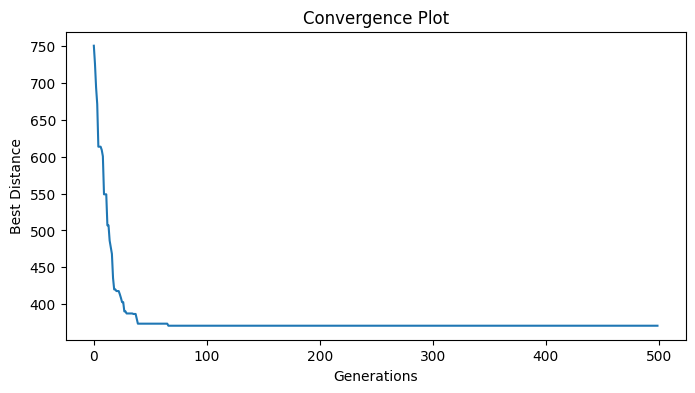

In [10]:
# Generate Random Cities
num_cities = 20
cities = np.random.rand(num_cities, 2) * 100  # Random coordinates in a 100x100 grid

# Run GA
best_route, best_distance, history = genetic_algorithm_tsp(cities)

# Visualizing the Best Route
def plot_route(route, cities, title="Best TSP Route"):
    plt.figure(figsize=(8, 6))
    ordered_cities = np.array([cities[i] for i in route] + [cities[route[0]]])  # Close the loop
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'o-', label="Route")
    
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), fontsize=12, ha="right")
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(title)
    plt.legend()
    plt.show()

plot_route(best_route, cities)

# Visualizing Convergence
plt.figure(figsize=(8, 4))
plt.plot(history)
plt.xlabel("Generations")
plt.ylabel("Best Distance")
plt.title("Convergence Plot")
plt.show()
